<a href="https://colab.research.google.com/github/kelvinfoo123/Survival-Analysis/blob/main/Survival_Analysis_Chapter_3_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [1]:
install.packages("survival")
library(survival)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Calculating Survival Probabilities and Plotting Survival Curves**

Example 1 with no estimates of the survival function

In [2]:
time = c(7,6,6,5,2,4)
event = c(0,1,0,0,1,1)

Surv(time, event)

[1] 7+ 6  6+ 5+ 2  4 

In [4]:
result.km = survfit(Surv(time, event) ~ 1, conf.type = 'log-log')
result.km

Call: survfit(formula = Surv(time, event) ~ 1, conf.type = "log-log")

     n events median 0.95LCL 0.95UCL
[1,] 6      3      6       2      NA



*   Number of events = 3 (3 deaths)
*   Median survival time = 6
*   95% lower confidence interval for median = 2





In [5]:
summary(result.km) # Survival contains survival probability for each of the time with events. 

Call: survfit(formula = Surv(time, event) ~ 1, conf.type = "log-log")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    2      6       1    0.833   0.152       0.2731        0.975
    4      5       1    0.667   0.192       0.1946        0.904
    6      3       1    0.444   0.222       0.0662        0.785

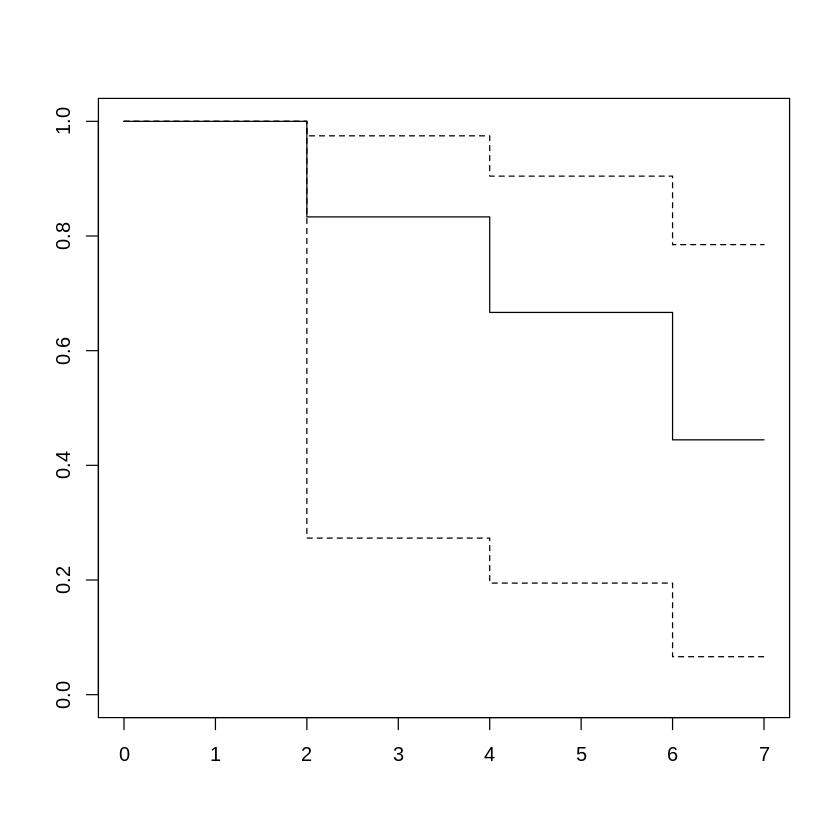

In [6]:
plot(result.km) # Dotted lines represent survival curves for lower and upper CI. 

Example 1 with Nelson-Altschuler estimate of survival function

In [7]:
result.fh = survfit(Surv(time, event) ~ 1, conf.type = 'log-log', type = 'fh')
summary(result.fh)

Call: survfit(formula = Surv(time, event) ~ 1, conf.type = "log-log", 
    type = "fh")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    2      6       1    0.846   0.141        0.306        0.977
    4      5       1    0.693   0.180        0.229        0.913
    6      3       1    0.497   0.210        0.101        0.807

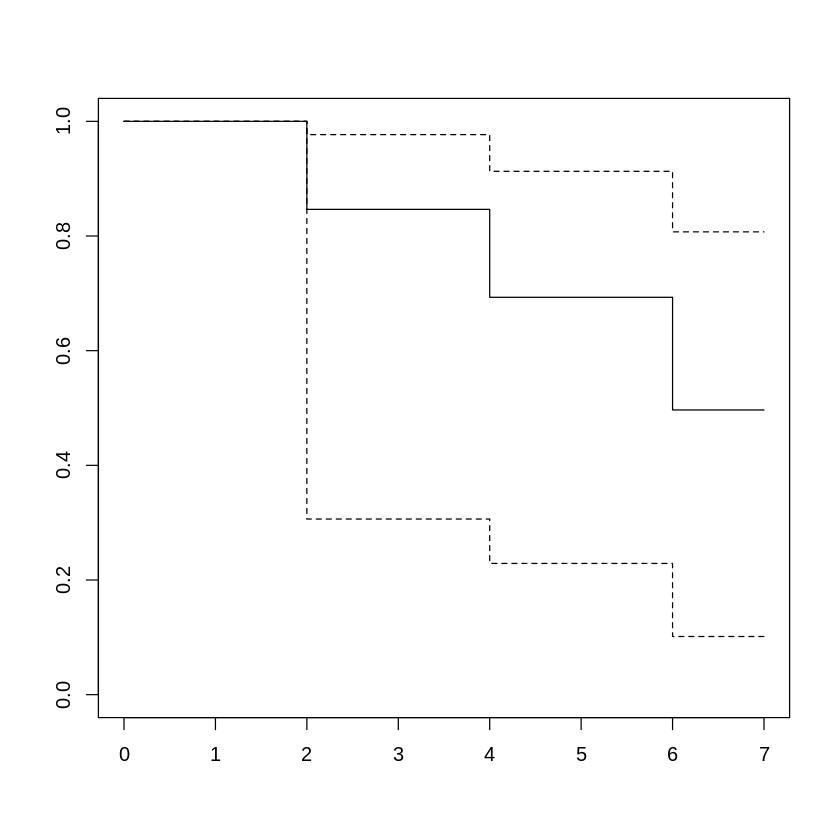

In [8]:
plot(result.fh)

Example 2 (GastricXelox Dataset)

In [9]:
install.packages("asaur")
library(asaur)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



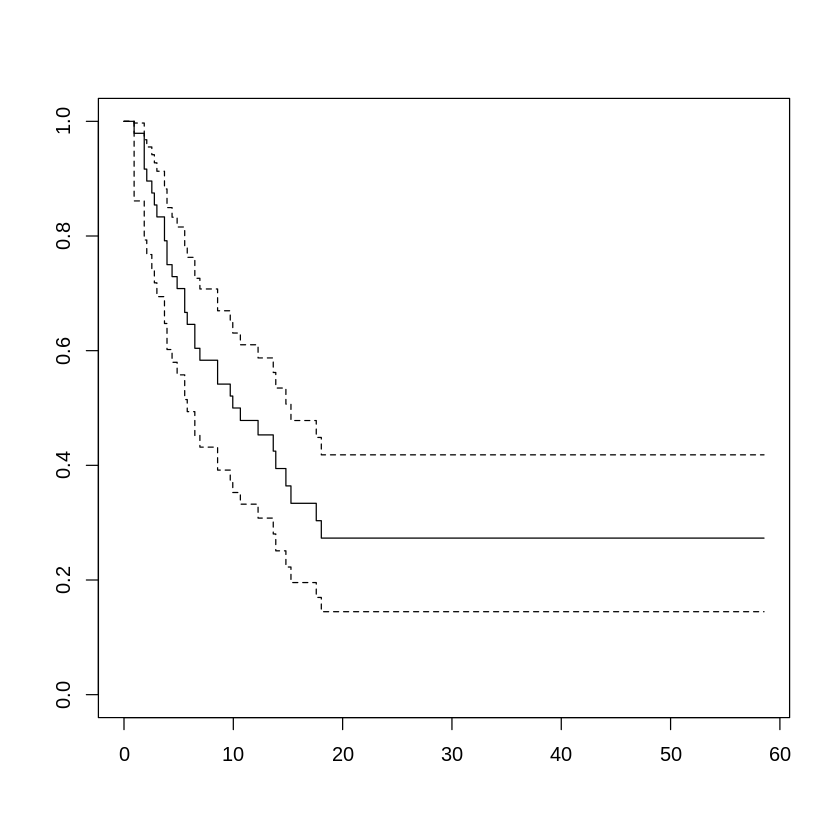

In [10]:
timeMonths = gastricXelox$timeWeeks * 7 / 30.25 # Convert into months 
delta = gastricXelox$delta 
result.km = survfit(Surv(timeMonths, delta) ~ 1, conf.type = 'log-log')
plot(result.km)

**Find Median Follow Up Time**

In [11]:
delta.followup = 1 - delta # Flip death and censored to find median follow up time 
survfit(Surv(timeMonths, delta.followup) ~ 1)

Call: survfit(formula = Surv(timeMonths, delta.followup) ~ 1)

      n events median 0.95LCL 0.95UCL
[1,] 48     16   27.8    21.1    50.2


*   Potential median follow up time = 27.8 months



**Smoothed Hazard Function Estimate**

In [12]:
# Library for estimating hazard function 
install.packages("muhaz")
library(muhaz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



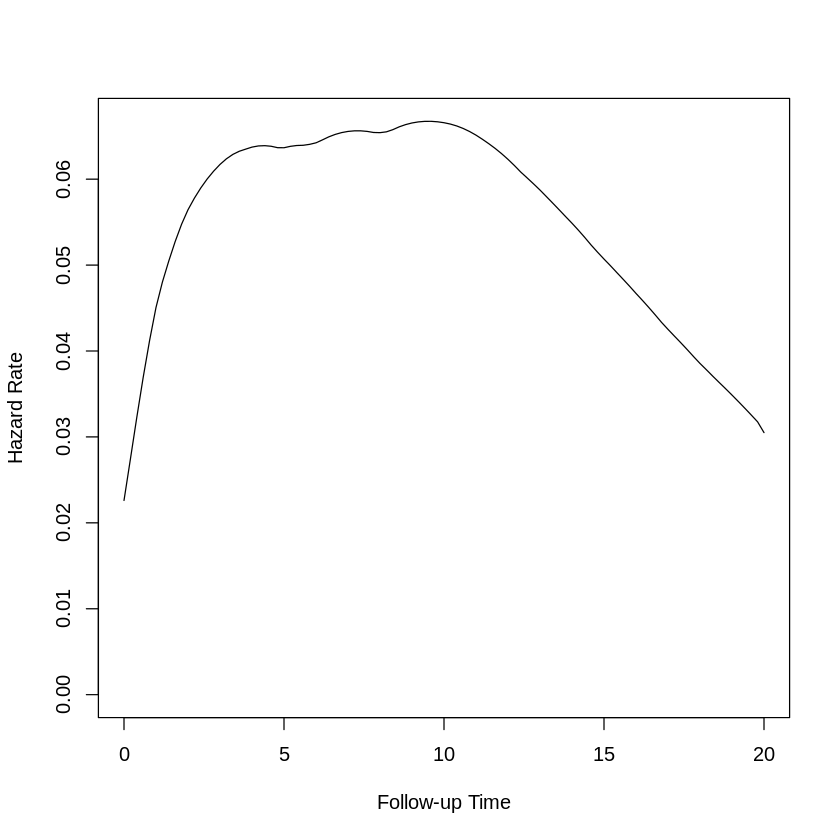

In [14]:
result.smooth = muhaz(timeMonths, delta, bw.smooth = 20, b.cor = "left", max.time = 20) # bw.smooth is smoothing parameter
# b.cor = left indicates that we want boundary correction to the left, at small t. 
plot(result.smooth)

**Smoothed Survival Function Estimate**

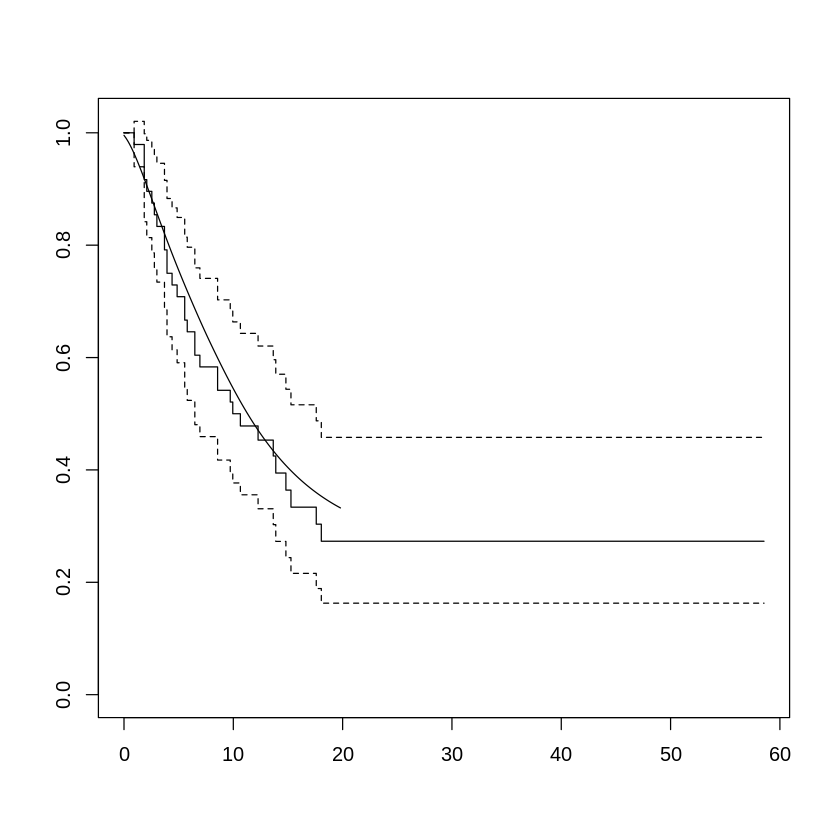

In [16]:
haz = result.smooth$haz.est
times = result.smooth$est.grid 
surv = exp(-cumsum(haz[1:(length(haz) - 1)] * diff(times)))

result.km = survfit(Surv(timeMonths, delta) ~ 1, conf.type = "none") # Original survival function 
plot(result.km)
lines(surv ~ times[1:length(times) -1]) # Smooth survival estimate 

**Left Truncation**

Example 1

In [17]:
time = c(7, 6, 6, 5, 2 , 4)
event = c(0, 1, 0, 0, 1, 1)
diagnosis = c(-2, -5, -3, -3, -2, -5) # Time of diagnosis 

tm.enter = -diagnosis # Time of entry into trial, Treat diagnosis as time of origin 
tm.exit = time - diagnosis # Time of exit from trial 

result.left.trunc.km = survfit(Surv(tm.enter, tm.exit, event, type = 'counting') ~ 1, conf.type = 'none')
summary(result.left.trunc.km)

Call: survfit(formula = Surv(tm.enter, tm.exit, event, type = "counting") ~ 
    1, conf.type = "none")

 time n.risk n.event censored survival std.err
    4      4       1        0    0.750   0.217
    9      4       1        3    0.562   0.230
   11      1       1        0    0.000     NaN

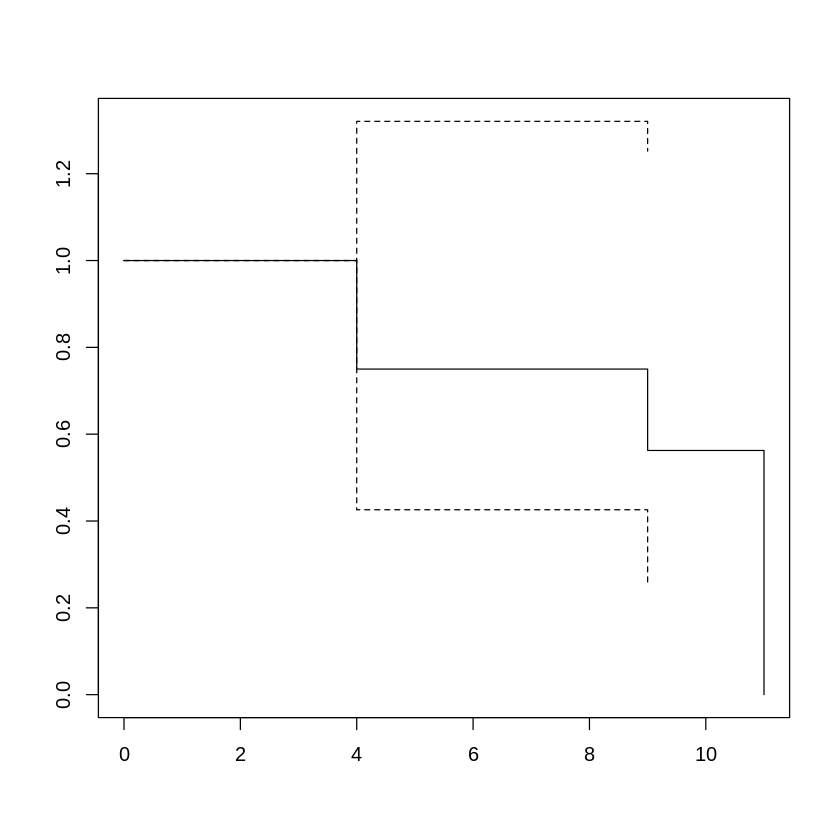

In [18]:
plot(result.left.trunc.km)